# 1. Import Data

In [1]:
import pandas as pd 

In [2]:
df = pd.read_csv('clusterdata.csv')

In [3]:
# View the first five rows 
df.head()

,user_id,published,post_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,af60c7da-acb4-11ec-880a-a0cec8d2d278,1648512000,short,216,58,5,53,18,12,21,6,43
1,af60c7e4-acb4-11ec-ab31-a0cec8d2d278,1647993600,short,196,45,0,73,35,8,16,25,39
2,af60c7f9-acb4-11ec-bead-a0cec8d2d278,1647907200,short,138,6,13,59,33,5,16,12,13
3,af60c815-acb4-11ec-a572-a0cec8d2d278,1648080000,short,81,9,1,9,34,18,11,4,5
4,af60c80d-acb4-11ec-aeb5-a0cec8d2d278,1647820800,short,166,53,11,75,0,5,17,24,45


In [4]:
df.tail()

,user_id,published,post_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
7042,af60c816-acb4-11ec-b01d-a0cec8d2d278,1648166400,photo,293,15,25,173,79,9,15,17,0
7043,af60c7fd-acb4-11ec-8226-a0cec8d2d278,1647993600,short,119,14,0,24,58,8,15,13,1
7044,af60c7e0-acb4-11ec-9163-a0cec8d2d278,1648166400,short,100,9,5,0,46,25,13,8,8
7045,af60c7f6-acb4-11ec-ba47-a0cec8d2d278,1647388800,short,74,10,8,0,38,15,16,0,5
7046,af60c7d9-acb4-11ec-84c2-a0cec8d2d278,1648166400,video,225,46,7,142,23,11,30,19,0


# 2. Split Data into Training and Testing

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train, test = train_test_split(df, test_size=0.3, random_state=1234)

In [7]:
train.shape

(4932, 12)

In [8]:
test.shape

(2115, 12)

In [9]:
2115 / df.shape[0]

0.3001277139208174

# 3. Exploratory Data Analysis

## Review Data

In [10]:
train.dtypes

user_id          object
published         int64
post_type        object
num_reactions     int64
num_comments      int64
num_shares        int64
num_likes         int64
num_loves         int64
num_wows          int64
num_hahas         int64
num_sads          int64
num_angrys        int64
dtype: object

In [11]:
train.post_type.unique()

array(['short', 'video', 'photo', 'text'], dtype=object)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4932 entries, 5145 to 2863
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        4932 non-null   object
 1   published      4932 non-null   int64 
 2   post_type      4932 non-null   object
 3   num_reactions  4932 non-null   int64 
 4   num_comments   4932 non-null   int64 
 5   num_shares     4932 non-null   int64 
 6   num_likes      4932 non-null   int64 
 7   num_loves      4932 non-null   int64 
 8   num_wows       4932 non-null   int64 
 9   num_hahas      4932 non-null   int64 
 10  num_sads       4932 non-null   int64 
 11  num_angrys     4932 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 500.9+ KB


In [13]:
train.isnull().sum()

user_id          0
published        0
post_type        0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

## Summary Stats

In [14]:
train.describe()

,published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,4.932000e+03,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000
mean,1.647943e+09,189.214923,29.540552,9.145985,85.684712,41.381387,14.974250,18.666464,13.934712,14.573398
std,3.513294e+05,75.843449,20.669640,7.807651,67.498828,24.422694,5.012694,8.141871,9.826429,16.039171
min,1.647389e+09,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.647648e+09,121.000000,10.000000,3.000000,19.000000,23.000000,12.000000,13.000000,6.000000,1.000000
50%,1.647994e+09,191.000000,20.000000,7.000000,79.000000,37.000000,15.000000,17.000000,13.000000,8.000000
75%,1.648253e+09,256.000000,50.000000,14.000000,150.000000,57.000000,18.000000,24.000000,20.000000,23.000000
max,1.648512e+09,378.000000,70.000000,37.000000,239.000000,127.000000,34.000000,45.000000,51.000000,67.000000


In [15]:
# 1.5 IQR Rule Applied to the Upper Range
150+1.5*(150-19)

346.5

In [16]:
# Relationship between the number of reactions and specific reaction types
85.7+41.4+15.0+18.7+13.9+14.6

189.29999999999998

In [17]:
train.describe(include='object')

,user_id,post_type
count,4932,4932
unique,100,4
top,af60c7c8-acb4-11ec-adad-a0cec8d2d278,short
freq,71,3081


## Plot Distributions

In [18]:
from matplotlib import pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [19]:
%matplotlib inline

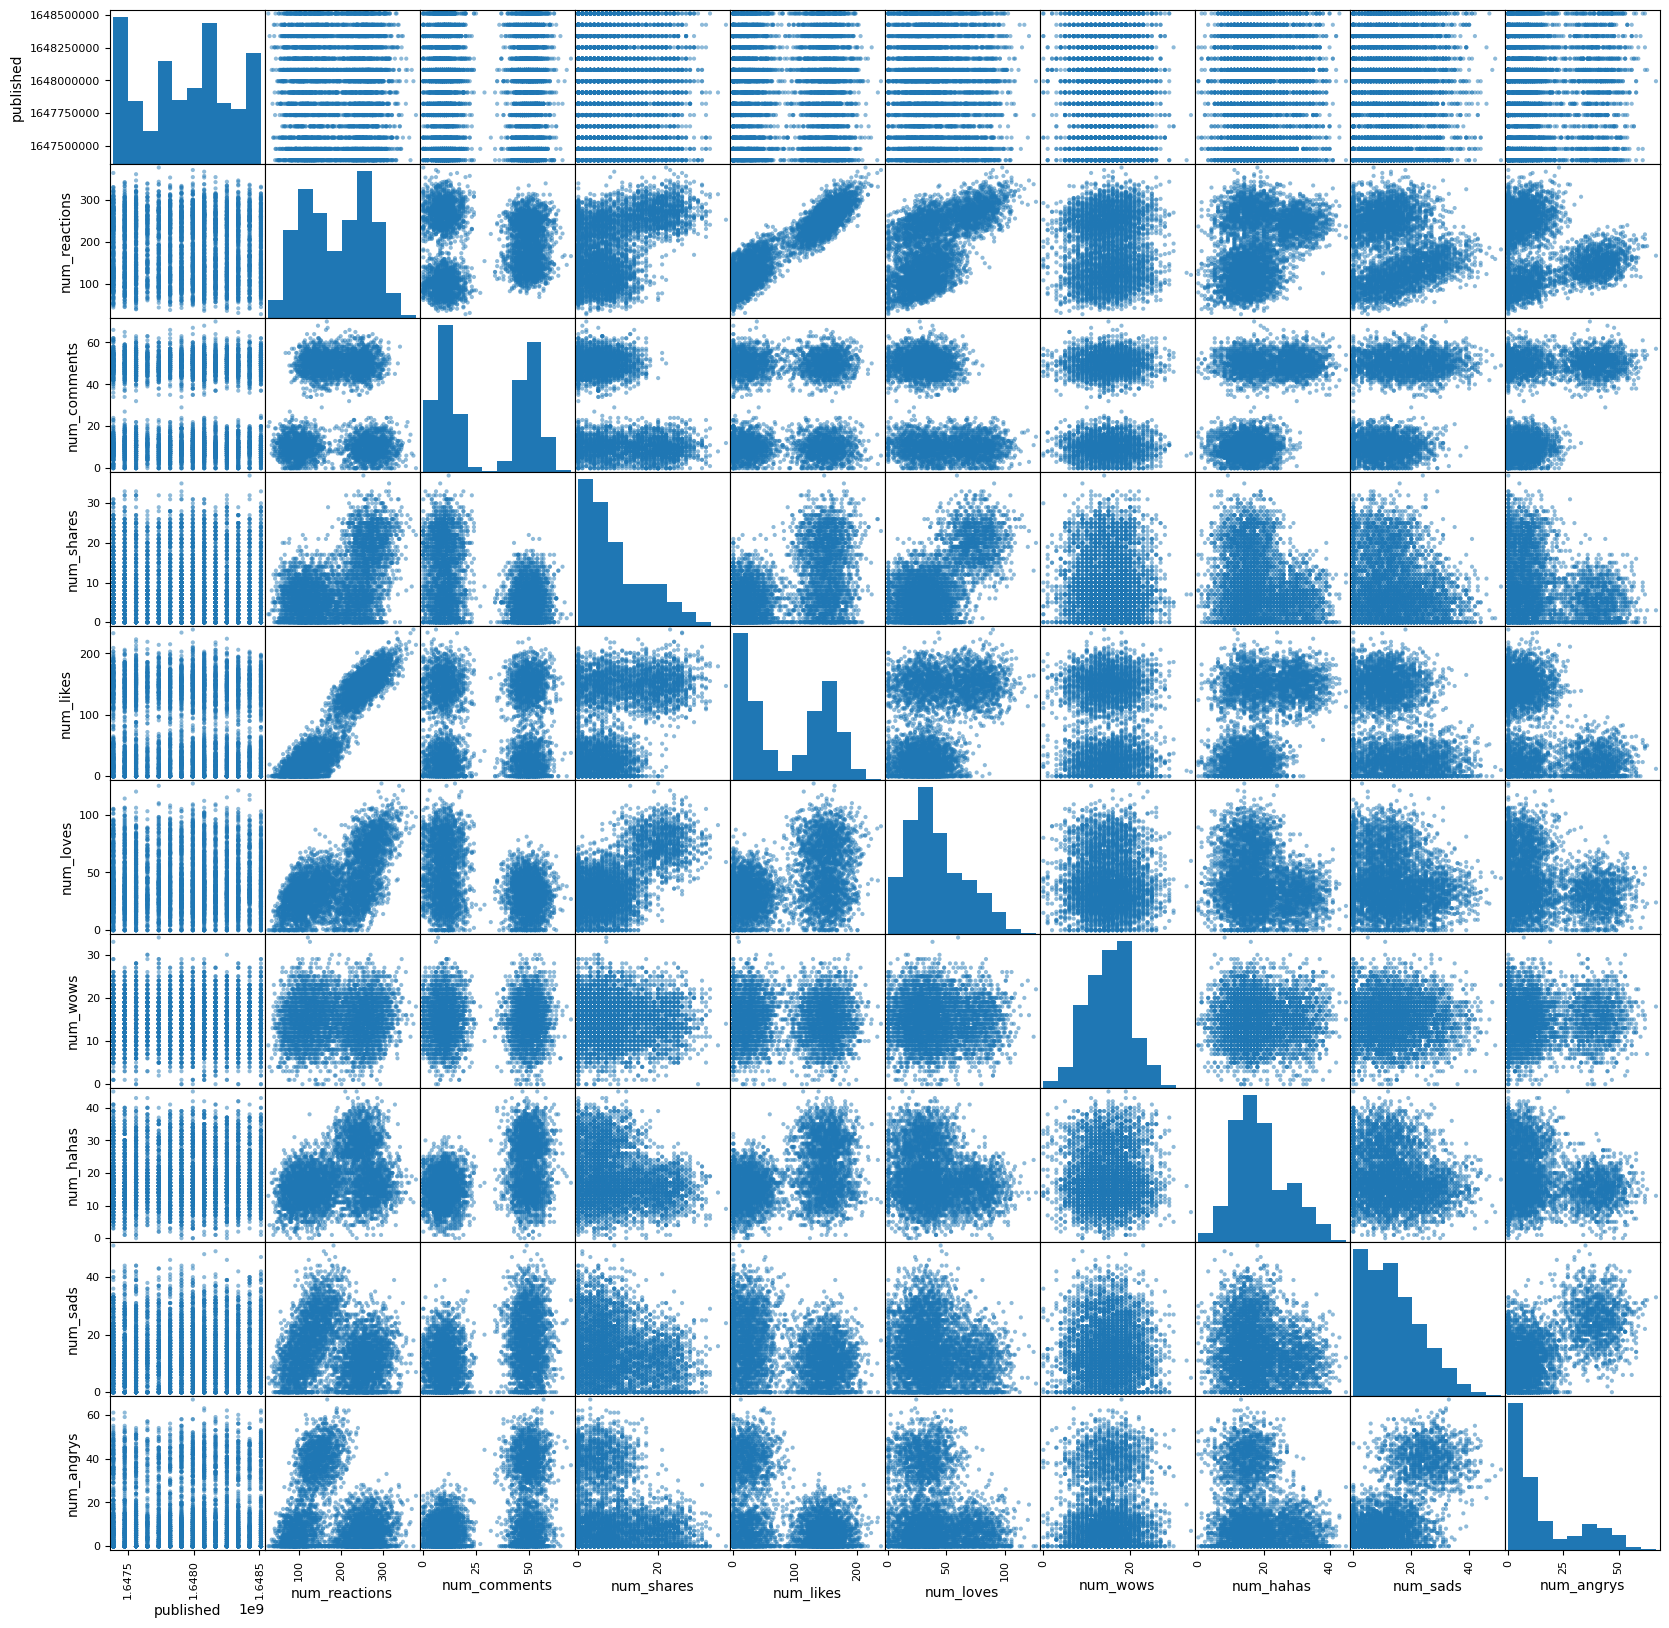

In [20]:
scatter_matrix(train, figsize=(20,20))
plt.show()

## Review Types of Posts

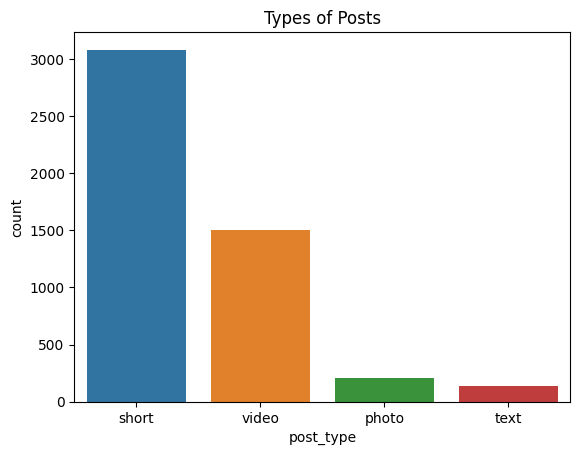

In [21]:
sns.countplot(x='post_type', data=train).set_title('Types of Posts')
plt.show()

## Can we see any relationships between Post Type and Responses

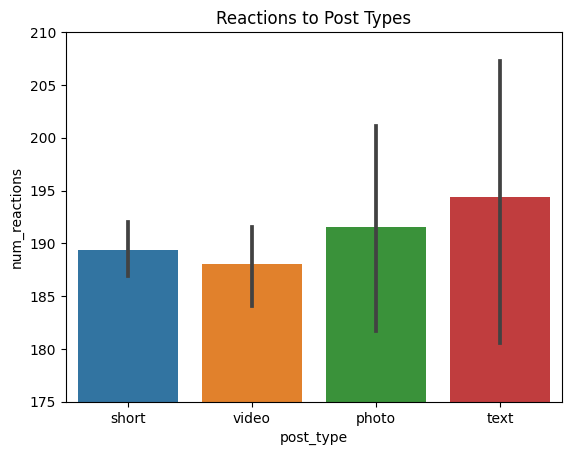

In [22]:
sns.barplot(x='post_type', y='num_reactions', data=train).set_title('Reactions to Post Types') 
plt.ylim((175,210))
plt.show()

## What does status published represent?

In [23]:
pd.to_datetime(1647734400, unit='s')

Timestamp('2022-03-20 00:00:00')

In [24]:
train['published']

5145    1647734400
5940    1647734400
5046    1647648000
6089    1647388800
3890    1648166400
           ...    
664     1648080000
3276    1647993600
1318    1648166400
723     1648252800
2863    1648252800
Name: published, Length: 4932, dtype: int64

In [25]:
train['timestamp'] = pd.to_datetime(train['published'], unit='s')

In [26]:
train.timestamp.dt.day

5145    20
5940    20
5046    19
6089    16
3890    25
        ..
664     24
3276    23
1318    25
723     26
2863    26
Name: timestamp, Length: 4932, dtype: int64

## Is there a relationship with time?

In [57]:
train['day'] = train['timestamp'].dt.day
train['day_name'] = train['timestamp'].dt.day_name()
train['monthstart'] = train['timestamp'].dt.is_month_start
train['monthend'] = train['timestamp'].dt.is_month_end
train['quarterstart'] = train['timestamp'].dt.is_quarter_start
train['quarterend'] = train['timestamp'].dt.is_quarter_end
train['month'] = train['timestamp'].dt.month

In [58]:
train.head()

,user_id,published,post_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,timestamp,day,day_name,monthstart,monthend,quarterstart,quarterend,month
5145,af60c7e1-acb4-11ec-a565-a0cec8d2d278,1647734400,short,378,0,22,214,98,18,18,7,23,2022-03-20,20,Sunday,False,False,False,False,3
5940,af60c819-acb4-11ec-ac22-a0cec8d2d278,1647734400,video,248,11,24,127,69,19,8,25,0,2022-03-20,20,Sunday,False,False,False,False,3
5046,af60c813-acb4-11ec-9b28-a0cec8d2d278,1647648000,video,147,57,0,26,57,12,4,14,34,2022-03-19,19,Saturday,False,False,False,False,3
6089,af60c809-acb4-11ec-8a3c-a0cec8d2d278,1647388800,short,114,51,6,2,22,7,21,22,40,2022-03-16,16,Wednesday,False,False,False,False,3
3890,af60c7e2-acb4-11ec-9952-a0cec8d2d278,1648166400,video,158,47,0,28,39,7,12,33,39,2022-03-25,25,Friday,False,False,False,False,3


In [53]:
# We've only got one month of data
train.month.unique()

array([3], dtype=int64)

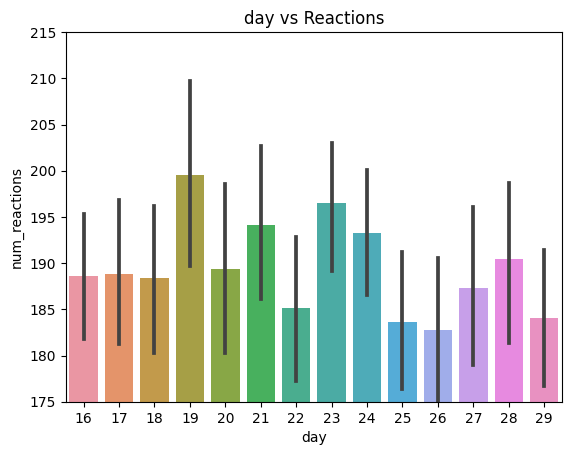

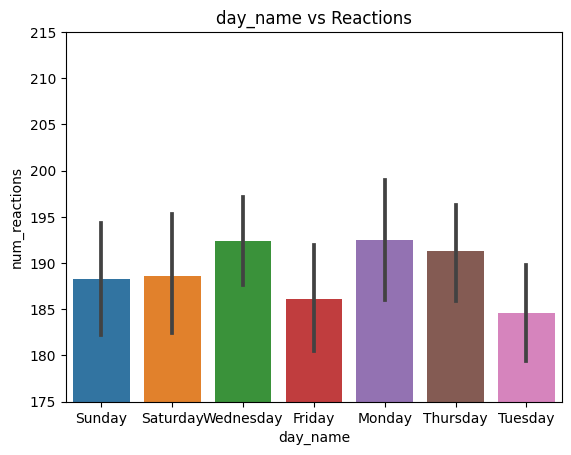

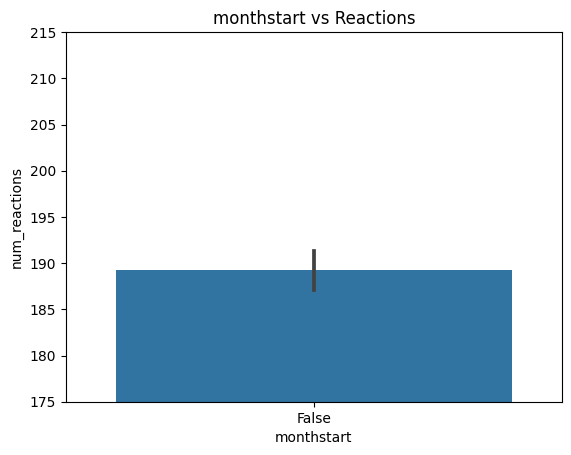

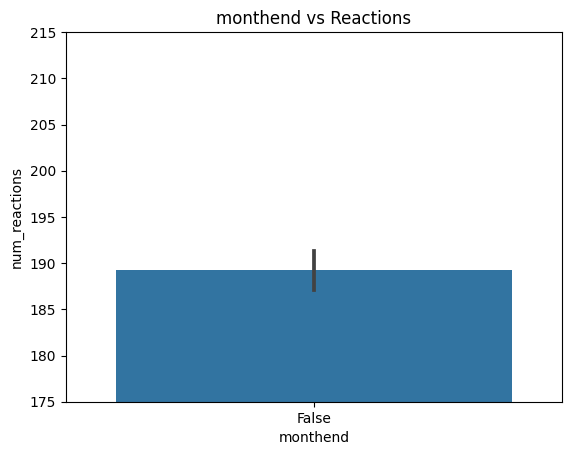

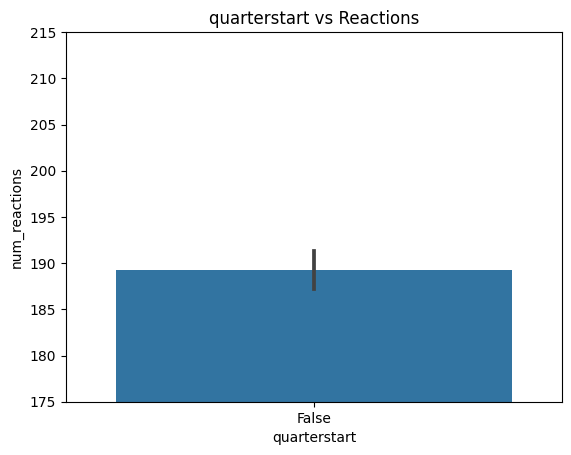

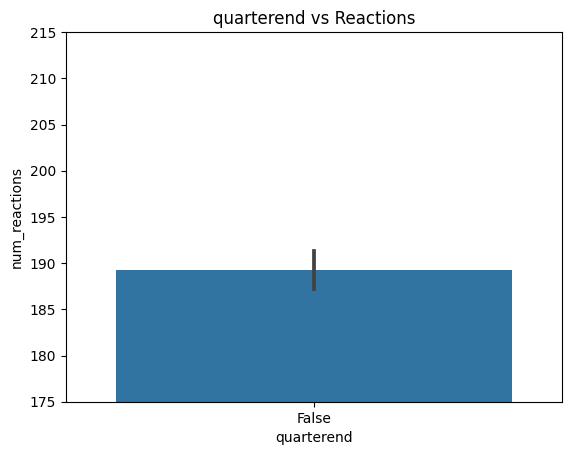

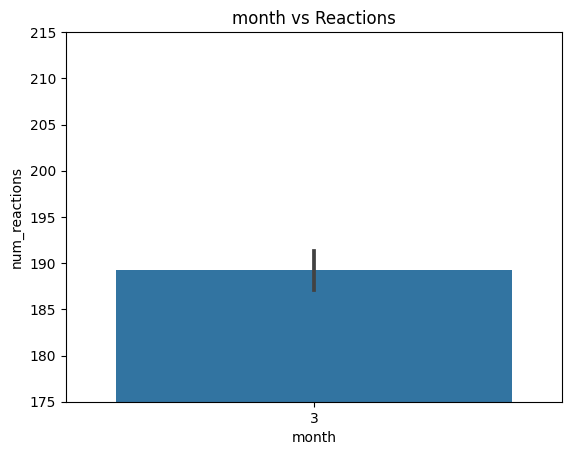

In [59]:
for col in train.columns[-7:]:
    sns.barplot(x=col, y='num_reactions', data=train).set_title(f'{col} vs Reactions')
    plt.ylim((175,215))
    plt.show()

In [60]:
train = train.drop(['timestamp','published','day','monthstart','monthend',
                    'quarterstart','quarterend', 'month'], axis=1)

In [61]:
train.columns

Index(['user_id', 'post_type', 'num_reactions', 'num_comments', 'num_shares',
       'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads',
       'num_angrys', 'day_name'],
      dtype='object')

# 4. Data Preprocessing

## Scale Features

In [68]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [69]:
train.dtypes

user_id          object
post_type        object
num_reactions     int64
num_comments      int64
num_shares        int64
num_likes         int64
num_loves         int64
num_wows          int64
num_hahas         int64
num_sads          int64
num_angrys        int64
day_name         object
dtype: object

In [70]:
scaler = StandardScaler()
scaled = scaler.fit_transform(train.drop(['user_id','post_type','day_name'], axis=1).to_numpy())

In [74]:
train.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000,4932.000000
mean,189.214923,29.540552,9.145985,85.684712,41.381387,14.974250,18.666464,13.934712,14.573398
std,75.843449,20.669640,7.807651,67.498828,24.422694,5.012694,8.141871,9.826429,16.039171
min,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,121.000000,10.000000,3.000000,19.000000,23.000000,12.000000,13.000000,6.000000,1.000000
50%,191.000000,20.000000,7.000000,79.000000,37.000000,15.000000,17.000000,13.000000,8.000000
75%,256.000000,50.000000,14.000000,150.000000,57.000000,18.000000,24.000000,20.000000,23.000000
max,378.000000,70.000000,37.000000,239.000000,127.000000,34.000000,45.000000,51.000000,67.000000


## One Hot Encode Status Type

In [75]:
train.dtypes

user_id          object
post_type        object
num_reactions     int64
num_comments      int64
num_shares        int64
num_likes         int64
num_loves         int64
num_wows          int64
num_hahas         int64
num_sads          int64
num_angrys        int64
day_name         object
dtype: object

In [76]:
from sklearn.preprocessing import OneHotEncoder

In [80]:
onehot = OneHotEncoder(handle_unknown='ignore')
encoded = onehot.fit_transform(train[['user_id','post_type', 'day_name']]).toarray()

In [87]:
encoded[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [88]:
onehot.get_feature_names_out()

array(['user_id_af60c7c0-acb4-11ec-b646-a0cec8d2d278',
       'user_id_af60c7c1-acb4-11ec-8cb0-a0cec8d2d278',
       'user_id_af60c7c2-acb4-11ec-8608-a0cec8d2d278',
       'user_id_af60c7c3-acb4-11ec-97e2-a0cec8d2d278',
       'user_id_af60c7c4-acb4-11ec-9d00-a0cec8d2d278',
       'user_id_af60c7c5-acb4-11ec-83fd-a0cec8d2d278',
       'user_id_af60c7c6-acb4-11ec-918b-a0cec8d2d278',
       'user_id_af60c7c7-acb4-11ec-b103-a0cec8d2d278',
       'user_id_af60c7c8-acb4-11ec-adad-a0cec8d2d278',
       'user_id_af60c7c9-acb4-11ec-9a3b-a0cec8d2d278',
       'user_id_af60c7ca-acb4-11ec-87b8-a0cec8d2d278',
       'user_id_af60c7cb-acb4-11ec-b3b4-a0cec8d2d278',
       'user_id_af60c7cc-acb4-11ec-b9c1-a0cec8d2d278',
       'user_id_af60c7cd-acb4-11ec-a542-a0cec8d2d278',
       'user_id_af60c7ce-acb4-11ec-b2df-a0cec8d2d278',
       'user_id_af60c7cf-acb4-11ec-96a2-a0cec8d2d278',
       'user_id_af60c7d0-acb4-11ec-935e-a0cec8d2d278',
       'user_id_af60c7d1-acb4-11ec-ab28-a0cec8d2d278',
       'us

In [85]:
len(train['user_id'].unique())

100

In [90]:
X_train = np.c_[scaled, encoded]

In [92]:
X_train[0]

array([ 2.48939388, -1.42932083,  1.64650258,  1.90119298,  2.31851384,
        0.60367879, -0.08186465, -0.70579203,  0.52542966,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

# 5. Modelling

## Fit Models with a Range of Clusters

In [93]:
from sklearn.cluster import KMeans

In [96]:
fit_models = {}
for k in range(2,21): 
    model = KMeans(n_clusters=k)
    model.fit(X_train)
    fit_models[k] = model 

In [97]:
fit_models

{2: KMeans(n_clusters=2),
 3: KMeans(n_clusters=3),
 4: KMeans(n_clusters=4),
 5: KMeans(n_clusters=5),
 6: KMeans(n_clusters=6),
 7: KMeans(n_clusters=7),
 8: KMeans(),
 9: KMeans(n_clusters=9),
 10: KMeans(n_clusters=10),
 11: KMeans(n_clusters=11),
 12: KMeans(n_clusters=12),
 13: KMeans(n_clusters=13),
 14: KMeans(n_clusters=14),
 15: KMeans(n_clusters=15),
 16: KMeans(n_clusters=16),
 17: KMeans(n_clusters=17),
 18: KMeans(n_clusters=18),
 19: KMeans(n_clusters=19),
 20: KMeans(n_clusters=20)}

## Select Best Cluster size using Elbow Method

In [98]:
results = []
for k, model in fit_models.items(): 
    res = model.inertia_
    results.append(res)

In [102]:
for x in range(2,5): 
    print(x)

2
3
4


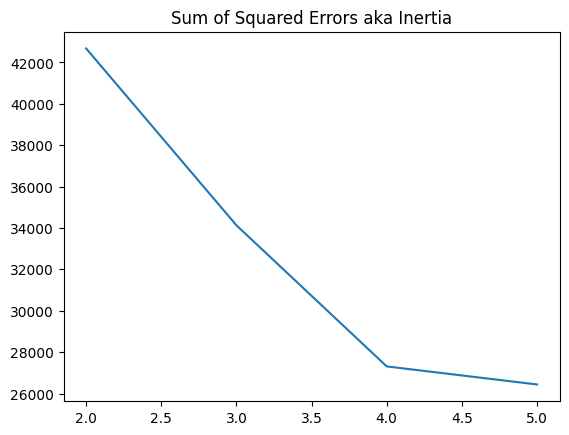

In [104]:
plt.title('Sum of Squared Errors aka Inertia')
plt.plot(range(2,6), results[:4])
plt.show()

In [100]:
results

[42670.39840330339,
 34126.795796305974,
 27309.85871370996,
 26437.57346780273,
 25654.56384103758,
 24873.870203168288,
 24101.31196307527,
 23788.516337203706,
 23420.486936882546,
 23107.4858450013,
 22887.68501576849,
 22574.095161220193,
 22315.830653675726,
 22161.90779619348,
 21923.120768269117,
 21686.887325576598,
 21417.554745732396,
 21374.963920501974,
 21147.55555325247]

# 6. Evaluate Models

## Choose Model and Make Predictions

In [105]:
model = fit_models[4]

In [107]:
def transform(raw_df, onehot, scaler): 
    X = raw_df.copy()
    X['timestamp'] = pd.to_datetime(X['published'], unit='s')
    X['day_name'] = X['timestamp'].dt.day_name()
    X = X.drop(['timestamp', 'published'], axis=1)
    
    encoded = onehot.transform(X[['user_id','post_type','day_name']])
    scaled = scaler.transform(X.drop(['user_id','post_type'
                                      ,'day_name'], axis=1).to_numpy())
    
    return np.c_[scaled, encoded.toarray()]

In [111]:
X_test = transform(test, onehot, scaler); X_test

array([[-0.79401753,  1.13508641, -0.01869963, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.2081482 , -1.13901058,  1.13413267, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.82790859, -1.28416571,  2.41505745, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.05207724, -0.84870033,  0.87794771, ...,  0.        ,
         0.        ,  0.        ],
       [-0.58303527,  0.8931612 , -1.17153193, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.34217785,  1.18347145,  0.10939285, ...,  0.        ,
         1.        ,  0.        ]])

In [113]:
X_train.shape

(4932, 120)

In [112]:
X_test.shape

(2115, 120)

In [114]:
clusters = model.predict(X_test)
test['cluster'] = clusters
test.head()

,user_id,published,post_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
4545,af60c7fa-acb4-11ec-9224-a0cec8d2d278,1648166400,short,129,53,9,21,13,13,19,29,34,3
2627,af60c7d0-acb4-11ec-935e-a0cec8d2d278,1647820800,video,205,6,18,140,40,7,15,3,0,2
1076,af60c80f-acb4-11ec-87f7-a0cec8d2d278,1647907200,video,252,3,28,149,60,19,14,8,2,2
4824,af60c7e5-acb4-11ec-accd-a0cec8d2d278,1647388800,text,259,54,0,155,49,15,26,0,14,0
3411,af60c7d5-acb4-11ec-8bf8-a0cec8d2d278,1647993600,short,105,12,4,49,16,11,10,8,11,1


In [115]:
test['cluster'].unique()

array([3, 2, 0, 1])

## Are cluster 0 posts performing the best?

In [123]:
test.dtypes

user_id          object
published         int64
post_type        object
num_reactions     int64
num_comments      int64
num_shares        int64
num_likes         int64
num_loves         int64
num_wows          int64
num_hahas         int64
num_sads          int64
num_angrys        int64
cluster           int32
dtype: object

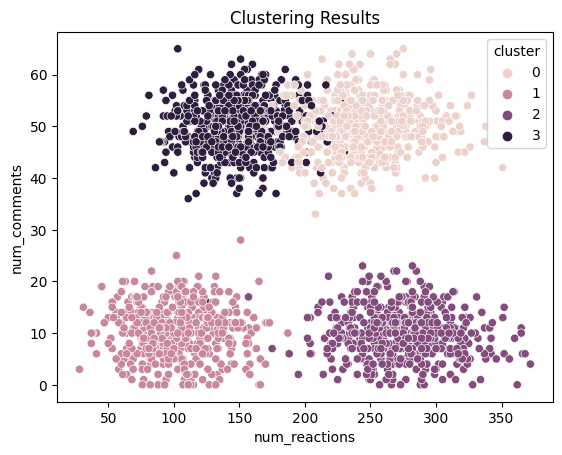

In [130]:
plt.title('Clustering Results')
sns.scatterplot(x='num_reactions', y='num_comments', hue='cluster', data=test)
plt.show()  

## Does Cluster Zero have a higher number of Reactions on Average?
- Alternative specifies what the alternative hypothesis represents
- two-sided: $H_0:a=b$, $H_a:a \neq b$
- less: $H_0:a>=b$, $H_a:a<b$
- greater: $H_0:a<=b$, $H_a:a>b$                

In [166]:
from scipy.stats import ttest_ind

In [173]:
# Sample 1: Cluster 0 number of reactions
cluster_zero_samples = test[test['cluster']==0]['num_reactions']
# Sample 2: Cluster 1,2,3 number reactions
cluster_other_samples = test[test['cluster']==2]['num_reactions']

# Hypothesis Test 
1. 95%, alpha 1-0.95 = 0.05 
2. Formulate hypotheses  
- H0:  Cluster 0 number of reactions <= Cluster 1,2,3 number of reactions
- HA:  Cluster 0 mean number of reactions > Cluster 1,2,3 number of reactions
3. pvalue < 0.05, reject our null hypothesis which is lending support to the HA

In [174]:
comparison = ttest_ind(cluster_zero_samples, cluster_other_samples, 
                       alternative='greater', equal_var=False)

In [175]:
comparison.pvalue

1.0

Reject the null HO, lending support to HA. 
- Cluster zero is performing uniquely well versus the other clusters
- Cluster two seems to be performing well, as well when compared to Cluster zero 

# 7. Deploy

## Score on all Data

In [176]:
X = transform(df, onehot, scaler)

In [177]:
clusters = model.predict(X)

In [178]:
df['cluster'] = clusters
df.to_csv('cluster_results.csv')

In [2]:
df.head()

NameError: name 'df' is not defined

## Install Dependencies for Dash

In [1]:
!pip install plotly dash 

You should consider upgrading via the 'D:\Full Stack Machine Learning\fullstack\Scripts\python.exe -m pip install --upgrade pip' command.
